# 1a. The Passive and Active Suspension System (with Ideal Actuation)

In [2]:
import matplotlib.pyplot as plt
import pycollimator as C
import math
%matplotlib widget

#Set up a connect to the collimator API
token = "507d5f58-59b6-4328-b600-765c1a1b2602" #copy your token here - I redacted the token for security purposes xDxD
project_uuid = "858d5ed1-16b2-4563-9e5e-8623755fe414" #copy your project uuid here
C.set_auth_token(token, project_uuid)

#View the models within the project file
print(C.list_models())

#load the models
passive = C.load_model('Passive Suspension Control')
active = C.load_model('Active Suspension Control')

#Run the Simulations and shows logs
sim_passive = C.run_simulation(passive)
sim_passive.show_logs()
sim_active = C.run_simulation(active)
sim_active.show_logs()

#Transform the simulation results into a pandas dataframe
data_pas = sim_passive.results.to_pandas()
data_act = sim_active.results.to_pandas()


# plt.figure()
# plt.title("Test")

[<Model name='Passive Suspension Control'>, <Model name='bump_signal'>, <Model name='Active Suspension Control'>, <Model name='Hydraulic Actuator Anti-Windup'>, <Model name='Hydraulic Actuator'>, <Model name='test_hydraulic_controller'>, <Model name='Active Suspension Hydraulic Actuator'>]

2023-09-03 23:01:54.378 INF model compiled successfully simulation_uuid=0847ed88-6bda-438a-a6f3-3a332fc907e0 time=0.26772284507751465
1970-01-07 18:20:07.366 INF starting model binary 🚀
1970-01-07 18:20:07.566 INF simulation completed successfully 🎉 total_time=0.200145 simulation_time=0.028929

2023-09-03 23:01:59.409 INF model compiled successfully simulation_uuid=7fe04338-9ee5-4cf3-8483-8e61194c8afc time=0.2690119743347168
1970-01-07 18:20:12.397 INF starting model binary 🚀
1970-01-07 18:20:12.642 INF simulation completed successfully 🎉 total_time=0.245716 simulation_time=0.083086


In [3]:
#View the first few rows of the dataframes
print(data_pas.head())
print()
print(data_act.head())

        Adder_0.out_0  Adder_1.out_0  Gain_0.out_0  Clock_0.out_0  \
time                                                                
0.0000            0.0            0.0           0.0         0.0000   
0.0001            0.0            0.0           0.0         0.0001   
0.0011            0.0            0.0           0.0         0.0011   
0.0111            0.0            0.0           0.0         0.0111   
0.1000            0.0            0.0           0.0         0.1000   

        Adder_2.out_0  Adder_3.out_0  Kt.out_0  bs.out_0  Derivative_0.out_0  \
time                                                                           
0.0000            0.0            0.0       0.0       0.0                 0.0   
0.0001            0.0            0.0       0.0       0.0                 0.0   
0.0011            0.0            0.0       0.0       0.0                 0.0   
0.0111            0.0            0.0       0.0       0.0                 0.0   
0.1000            0.0            0.0

# 1b. Comparison Plots between the Passive and the Ideal Actuated Active System

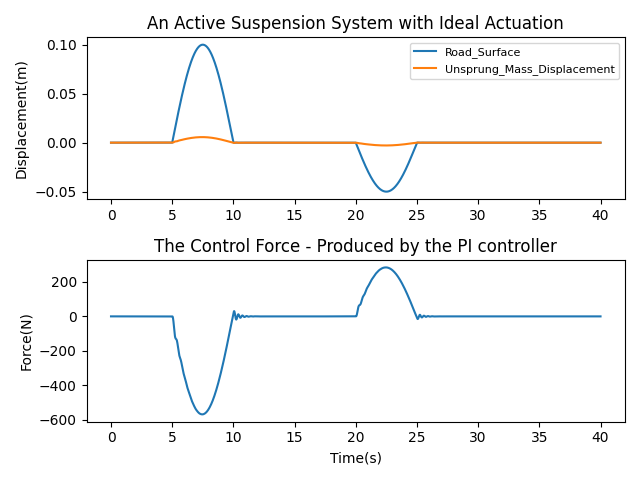

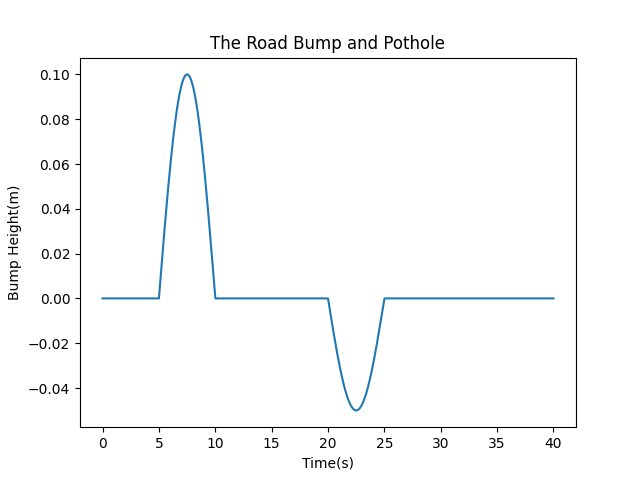

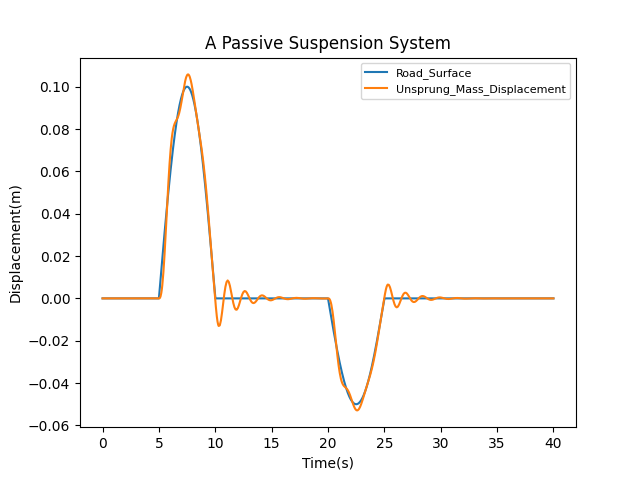

In [4]:
#Plot the results

#Plot the road bump and potholes
plt.figure(1)
plt.title('The Road Bump and Pothole')
plt.plot(data_pas['Zr_Road_Input.out_0'])
plt.ylabel('Bump Height(m)')
plt.xlabel('Time(s)')

#Plot the Road Bump and the Car's displacement for the passive suspension system
plt.figure(2)
plt.title("A Passive Suspension System")
plt.plot(data_pas['Zr_Road_Input.out_0'])
plt.plot(data_pas['integrator_Zs.out_0'] )
plt.ylabel('Displacement(m)')
plt.xlabel('Time(s)')
plt.legend(['Road_Surface','Unsprung_Mass_Displacement'],loc = 'upper right',fontsize=8)

#Plot the Road Bump and the Car's displacement and the control force for the active suspension system
# plt.figure(3)
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1)
# Plot the data on the subplots and set the titles
axs[0].plot(data_act['Zr_Road_Input.out_0'])
axs[0].plot(data_act['integrator_Zs.out_0'])
axs[0].set_title("An Active Suspension System with Ideal Actuation")
axs[0].set_ylabel('Displacement(m)')
axs[0].legend(['Road_Surface','Unsprung_Mass_Displacement'],loc = 'upper right',fontsize=8)

axs[1].plot(data_act['Control_Force.out_0'])
axs[1].set_title("The Control Force - Produced by the PI controller")
axs[1].set_ylabel('Force(N)')
axs[1].set_xlabel('Time(s)')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plots
plt.show()




# 2a. The Active Suspension System with a non-ideal Actuator (Hydraulic Actuator)

In [5]:
# Load the model
hydraulic = C.load_model('Hydraulic Actuator')

#Run the Simulations and shows logs
sim_hydraulic = C.run_simulation(hydraulic)
sim_hydraulic.show_logs()

#Transform the simulation results into a pandas dataframe
data_hyd = sim_hydraulic.results.to_pandas()

#View the first few rows of the dataframes
print(data_hyd.head())


2023-09-03 23:06:42.683 INF model compiled successfully simulation_uuid=dddadf60-06b9-4040-a088-48738620b62b time=0.38875484466552734
1970-01-07 18:14:31.456 INF starting model binary 🚀
1970-01-07 18:14:58.016 INF simulation completed successfully 🎉 total_time=26.560086 simulation_time=26.366829
      bt.out_0  Adder_5.out_0  Zs_Ref.out_0  Ks.out_0  integrator_Zs.out_0  \
time                                                                         
0.00       0.0            0.0           0.0       0.0                  0.0   
0.01       0.0            0.0           0.0       0.0                  0.0   
0.02       0.0            0.0           0.0       0.0                  0.0   
0.03       0.0            0.0           0.0       0.0                  0.0   
0.04       0.0            0.0           0.0       0.0                  0.0   

      Gain_4.out_0  Adder_6.out_0  Integrator_Zu.out_0  Zr_Road_Input.out_0  \
time                                                                        

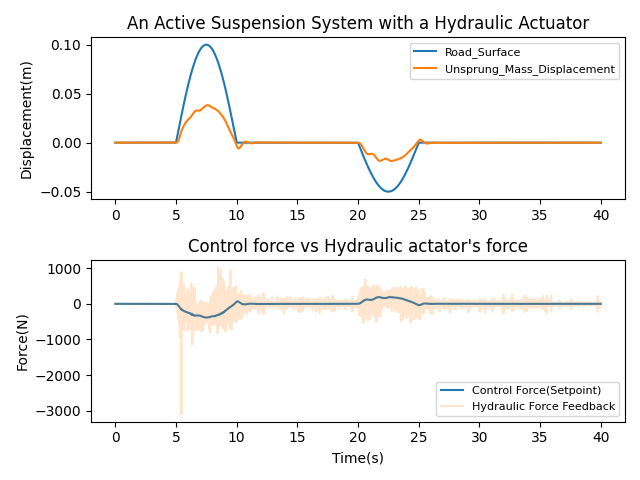

In [22]:
#1 Active suspension with a hydraulic actuator -road surface vs displacement
#2 Control force vs Hydraulic actator's force
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1)
# Plot the data on the subplots and set the titles
axs[0].plot(data_hyd['Zr_Road_Input.out_0'])
axs[0].plot(data_hyd['integrator_Zs.out_0'])
axs[0].set_title("An Active Suspension System with a Hydraulic Actuator")
axs[0].set_ylabel('Displacement(m)')
axs[0].legend(['Road_Surface','Unsprung_Mass_Displacement'],loc = 'upper right',fontsize=8)

axs[1].plot(data_hyd['PI_Controller.Force_Limit.out_0'])
axs[1].plot(data_hyd['Actuator.Force_Output.out_0'], alpha = 0.2)
axs[1].set_title("Control force vs Hydraulic actator's force")
axs[1].set_ylabel('Force(N)')
axs[1].set_xlabel('Time(s)')
axs[1].legend(['Control Force(Setpoint)','Hydraulic Force Feedback'],loc = 'lower right',fontsize=8)

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plots
plt.show()

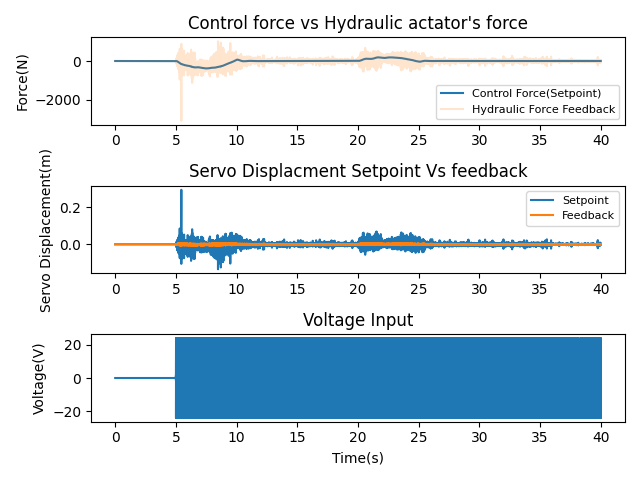

In [23]:
#Internal dynamics of the hydrualic actuator
#1. Control force vs Hydraulic actuator's force
#2. servo displacment setpoint & feedback
#3. voltage input

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1)
# Plot the data on the subplots and set the titles
axs[0].plot(data_hyd['PI_Controller.Force_Limit.out_0'])
axs[0].plot(data_hyd['Actuator.Force_Output.out_0'], alpha = 0.2)
axs[0].set_title("Control force vs Hydraulic actator's force")
axs[0].set_ylabel('Force(N)')
axs[0].legend(['Control Force(Setpoint)','Hydraulic Force Feedback'],loc = 'lower right',fontsize=8)

axs[1].plot(data_hyd['Actuator.Xsv_ref.out_0'])
axs[1].plot(data_hyd['Actuator.Gain_0.out_0'])
axs[1].set_title("Servo Displacment Setpoint Vs feedback")
axs[1].set_ylabel('Servo Displacement(m)')
axs[1].legend(['Setpoint','Feedback'],loc = 'upper right',fontsize=8)


axs[2].plot(data_hyd['Actuator.Voltage_Limit.out_0'])
axs[2].set_title("Voltage Input")
axs[2].set_ylabel('Voltage(V)')
axs[2].set_xlabel('Time(s)')




# Adjust the layout of the subplots
fig.tight_layout()

# Show the plots
plt.show()
